# 1) Look at Continuous bag of word and GloVe method

## Definition

### Word2vec

Word2vec est un groupe de modèles associés qui sont utilisés pour produire des intégrations de mots. Ces modèles sont des réseaux de neurones superficiels à deux couches qui sont entraînés pour reconstruire les contextes linguistiques des mots. Word2vec prend en entrée un grand corpus de texte et produit un espace vectoriel, typiquement de plusieurs centaines de dimensions, chaque mot unique du corpus se voyant attribuer un vecteur correspondant dans l'espace. Les vecteurs de mots sont positionnés dans l'espace vectoriel de telle sorte que les mots qui partagent des contextes communs dans le corpus soient proches les uns des autres dans l'espace.

### CBOW



CBOW or Continous bag of words is to use embeddings in order to train a neural network where the context is represented by multiple words for a given target words.

For example, we could use “cat” and “tree” as context words for “climbed” as the target word.
This calls for a modification to the neural network architecture.
The modification, shown below, consists of replicating the input to hidden layer connections C times, the number of context words, and adding a divide by C operation in the hidden layer neurons.

The dimension of our hidden layer and output layer will remain the same. Only the dimension of our input layer and the calculation of hidden layer activations will change, if we have 4 context words for a single target word, we will have 4 1xV input vectors. Each will be multiplied with the VxE hidden layer returning 1xE vectors. All 4 1xE vectors will be averaged element-wise to obtain the final activation which then will be fed into the softmax layer.

* CBOW Architecture

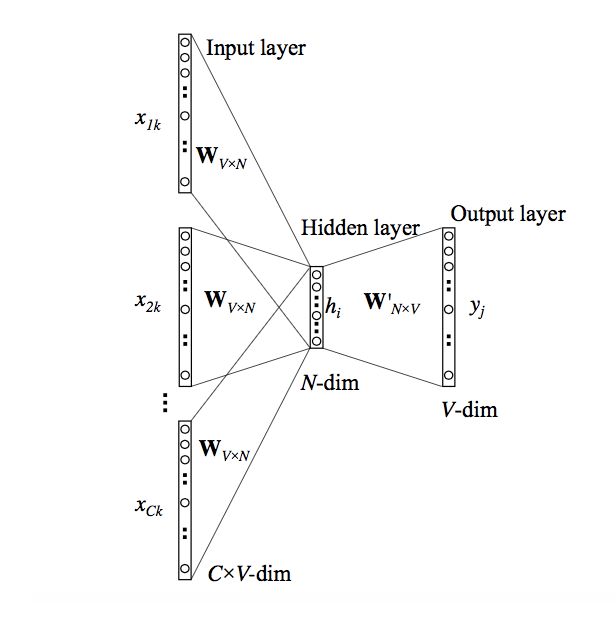

In [1]:
#from IPython.display import Image
#img = '/home/aimssn/Desktop/Yacouba/NLP/img.png'
#Image(filename=img)

### GloVe method

La methode GloVe est une extension de la méthode word2vec pour apprendre efficacement les vecteurs de mots.
c'est est un modèle de représentation de mots distribuée. Le modèle est un algorithme d' apprentissage non supervisé permettant d'obtenir des représentations vectorielles de mots. Ceci est réalisé en mappant les mots dans un espace significatif où la distance entre les mots est liée à la similitude sémantique. L'entrainement des donnée est effectuée sur des statistiques globales agrégées de co-occurrence mot par mot à partir d'un corpus, et les représentations résultantes présentent des sous-structures linéaires intéressantes de l' espace vectoriel de mots . Elle est développé en tant que modèle de régression log-bilinéaire pour l'apprentissage non supervisé de représentations de mots, elle combine les caractéristiques de deux familles de modèles, à savoir les méthodes de factorisation matricielle globale et de fenêtre contextuelle locale.
elle peut être utilisé pour trouver des relations entre des mots tels que des synonymes, des relations entreprise-produit, des codes postaux et des villes, etc. Elle est également utilisé par le modèle SpaCy pour créer des vecteurs de caractéristiques de mots sémantiques tout en calculant les principaux mots de la liste qui correspondent à la distance mesures telles que la similarité en cosinus et l' approche de la distance euclidienne .

# 2) GloVe vs skip-gram

 * 1- Présence de réseaux de neurones : GloVe n'utilise pas de réseaux de neurones contrairement à word2vec. Dans GloVe, la fonction de perte est la différence entre le produit des plongements de mots et le log de la probabilité de cooccurrence. Nous essayons de réduire cela et d'utiliser SGD mais de le résoudre comme nous résoudrions une régression linéaire. Alors que dans le cas de skip-gram, nous entraînons le mot sur son contexte  à l'aide d'un réseau de neurones à 1 couche cachée.



* 2- Informations globales : skip-gram n'a pas d'informations globales explicites intégrées par défaut. GloVe crée une matrice de cooccurrence globale en estimant la probabilité qu'un mot donné coexiste avec d'autres mots. Cette présence d'informations globales permet à GloVe de mieux fonctionner. Bien que dans un sens pratique, ils fonctionnent presque de la même manière et les gens ont trouvé des performances similaires avec les deux.



# Extend the Wikipedia exercise

## Implement a window based SVD model and visualize some example relationships

In [2]:
import bs4 as bs
import urllib

# link to the wikipedia of the president Senegal
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Macky_Sall')  
raw_html = raw_html.read()

wiki_html = bs.BeautifulSoup(raw_html, 'lxml')
article_paragraphs = wiki_html.find_all('p')
article_text = ''
for para in article_paragraphs:  
    article_text += para.text

In [3]:
import re
import numpy as np

In [4]:
text= re.sub(r"\[[0-9]*\]", '', article_text)
text= re.sub(r"[()]", '', text)
text= re.sub(r"[\n]", '', text)
text= re.sub(r"[']", '', text)
text= re.sub(r"[;]", '', text)
text= re.sub(r"[%]", '', text)
text= re.sub(r"[0123456789–]", '', text)

text=text.lower()

In [5]:
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())


In [6]:
text01 = tokenize(text)
vocab = set(text01)
#print(vocab)
len(vocab)

790

In [7]:
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
 
#sent = text001
 
#stop_words = set(stopwords.words('english'))
 
#word_tokens = vocab
 
#filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
#filtered_sentence = []
 #
#for w in word_tokens:
#    if w not in stop_words:
#        filtered_sentence.append(w)
#
#print(word_tokens)
#vocab=filtered_sentence
#print(vocab)
len(vocab)

790

In [8]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [9]:
vect.fit(vocab)
# examine the fitted vocabulary
print(vect.get_feature_names())

['abdoul', 'abdoulaye', 'abolished', 'abound', 'accomplished', 'accordance', 'accusation', 'accused', 'achieved', 'acquired', 'across', 'actively', 'acts', 'additionally', 'address', 'administration', 'advance', 'adviser', 'advisor', 'advisors', 'africa', 'african', 'after', 'again', 'against', 'age', 'agencies', 'agency', 'agriculture', 'aimed', 'airport', 'alioune', 'all', 'allegedly', 'alliance', 'allow', 'allowed', 'along', 'also', 'although', 'amadou', 'ambitious', 'aminata', 'an', 'and', 'announced', 'annulled', 'annulling', 'anti', 'any', 'appear', 'appointed', 'appointment', 'approved', 'apr', 'april', 'as', 'asked', 'assembly', 'associate', 'associated', 'associations', 'astonishing', 'at', 'attempt', 'audit', 'august', 'avoid', 'awarded', 'backing', 'badara', 'banker', 'bara', 'barred', 'barthélémy', 'bathily', 'be', 'became', 'becoming', 'been', 'before', 'beforehand', 'being', 'benno', 'between', 'bill', 'billion', 'blaise', 'bloch', 'bokk', 'born', 'boycott', 'brother', 'b

In [10]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(vocab)
simple_train_dtm

<790x787 sparse matrix of type '<class 'numpy.int64'>'
	with 787 stored elements in Compressed Sparse Row format>

In [11]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# examine the vocabulary and document-term matrix together
import pandas as pd
X=pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())


In [13]:
X

,abdoul,abdoulaye,abolished,abound,accomplished,accordance,accusation,accused,achieved,acquired,...,worth,would,wrongly,yakaar,yakkar,year,years,yookuté,yoonu,youssou
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 70,n_iter=10)
svd.fit(X)
s_data = svd.transform(X)
data = pd.DataFrame(s_data)

#data.to_csv("train_svd.csv")




svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=500, random_state=101)
embeddings_2d_projection = svd.fit_transform(X)



In [15]:
s_data.shape

(790, 70)

(-0.11, 0.11)

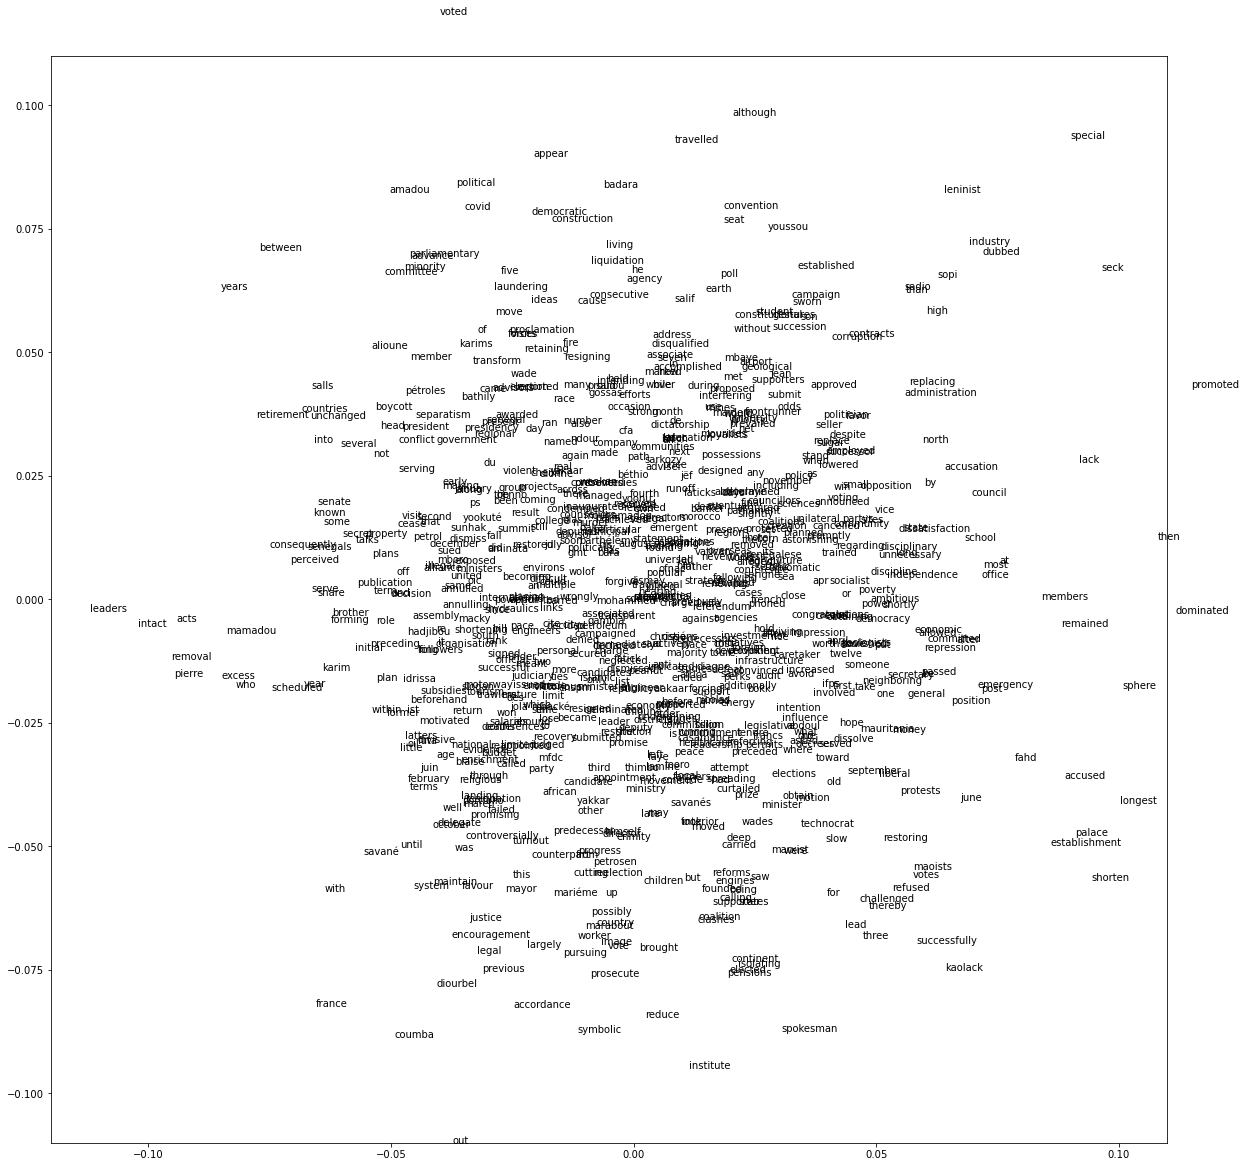

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
for i in range(len(vect.get_feature_names()[:790])):
    plt.text(s_data[i, 0], s_data[i, 1], vect.get_feature_names()[i])
    plt.axis()
plt.xlim(-0.12,0.11)
plt.ylim(-0.11,0.11)

Les données sont très volumineuses alors la visualisation est difficile. La proximité des mots traduit les similarités entre ceux-ci.

# Compare the performance of SVD based embedding to word2vec

In [17]:
def mapping(tokens):
    '''create a map between tokens and indices'''
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [18]:
word_to_idex, idex_to_word = mapping(text01)
word_to_idex

{'construction': 0,
 'wades': 1,
 'dismiss': 2,
 'avoid': 3,
 'twelve': 4,
 'take': 5,
 'candidates': 6,
 'strong': 7,
 'accused': 8,
 'acts': 9,
 'yakkar': 10,
 'number': 11,
 'investments': 12,
 'nicolas': 13,
 'perceived': 14,
 'possessions': 15,
 'abdoul': 16,
 'société': 17,
 'caretaker': 18,
 'barthélémy': 19,
 'excess': 20,
 'succession': 21,
 'policy': 22,
 'secret': 23,
 'development': 24,
 'marked': 25,
 'oil': 26,
 'bill': 27,
 'world': 28,
 'democracy': 29,
 'released': 30,
 'dissolve': 31,
 'move': 32,
 'possibly': 33,
 'hold': 34,
 'petroleum': 35,
 'college': 36,
 'saliou': 37,
 'five': 38,
 'proposed': 39,
 'former': 40,
 'obtain': 41,
 'leaders': 42,
 'barred': 43,
 'priority': 44,
 'left': 45,
 'personal': 46,
 'death': 47,
 'industry': 48,
 'replacing': 49,
 'african': 50,
 'intact': 51,
 'high': 52,
 'establishment': 53,
 'later': 54,
 'neighboring': 55,
 'any': 56,
 'macky': 57,
 'sphere': 58,
 'earth': 59,
 'billion': 60,
 'raised': 61,
 'set': 62,
 'son': 63,
 'f

In [19]:
np.random.seed(42)


def generate_training_data(tokens, word_to_idex, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_idex[tokens[i]], len(word_to_idex)))
            y.append(one_hot_encode(word_to_idex[tokens[j]], len(word_to_idex)))
    
    return np.asarray(X), np.asarray(y)


def concat(*iterables):
    for iterable in iterables:
        yield from iterable


def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res


In [20]:
X, y = generate_training_data(text01, word_to_idex, 2)
X.shape

(9190, 790)

In [21]:
svd.fit(X)
X_svd=svd.transform(X)


In [22]:
X_svd.shape

(9190, 2)

In [23]:
svd.fit(y)
Y_svd=svd.transform(y)

In [24]:
Y_svd.shape

(9190, 2)

### Implémentation de la technique Embedding avec un réseau de neurones 

In [25]:
from tensorflow.keras.layers import Embedding,Dense

In [26]:
from keras.models import Model, Sequential

In [27]:
model = Sequential()
model.add(Embedding(5, input_shape=(790,),output_dim=790)) 
model.add(Dense(1,activation = 'sigmoid')) 

In [28]:
 model.compile(optimizer='adam',                # mise à jour des poids de connection
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 790, 790)          3950      
_________________________________________________________________
dense (Dense)                (None, 790, 1)            791       
Total params: 4,741
Trainable params: 4,741
Non-trainable params: 0
_________________________________________________________________


In [30]:
history=model.fit(X_svd,Y_svd,epochs=5,batch_size=10)

Epoch 1/5
919/919 [==============================] - 2s 1ms/step - loss: 0.2843 - accuracy: 0.8374
Epoch 2/5
919/919 [==============================] - 1s 1ms/step - loss: 0.2364 - accuracy: 0.8417
Epoch 3/5
919/919 [==============================] - 1s 1ms/step - loss: 0.2398 - accuracy: 0.8400
Epoch 4/5
919/919 [==============================] - 1s 1ms/step - loss: 0.2536 - accuracy: 0.8379
Epoch 5/5
919/919 [==============================] - 1s 1ms/step - loss: 0.2428 - accuracy: 0.8417


### Evolution de la fonction loss avec les données issues du SVD

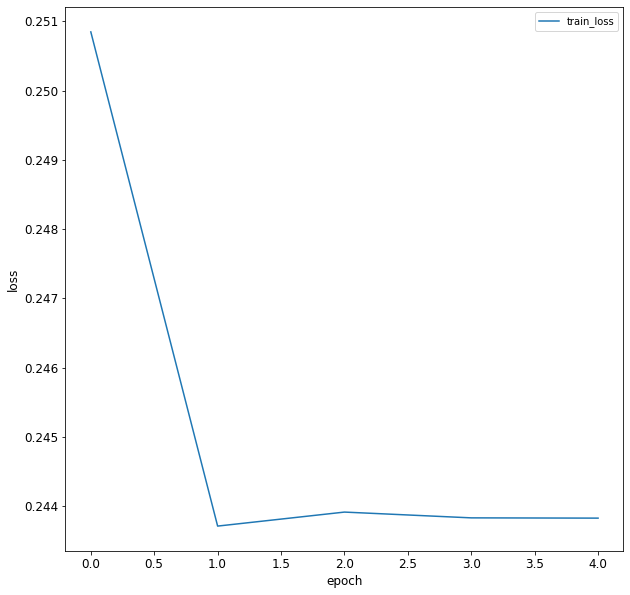

In [31]:
df1 = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
df1.plot(logy=False, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [32]:
model.evaluate(X,y)[1]

288/288 [==============================] - 12s 41ms/step - loss: 0.0569 - accuracy: 0.9987


0.9987351298332214

## Word2vec model

In [33]:
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

### Created of data of the form [(context), target]

In [34]:
 

data = []
for i in range(2, len(text01) - 2):
    context = [text01[i - 2], text01[i - 1], text01[i + 1], text01[i + 2]]
    target = text01[i]
    data.append((context, target))
print(data[:5])

[(['macky', 'sall', 'december', 'is'], 'born'), (['sall', 'born', 'is', 'a'], 'december'), (['born', 'december', 'a', 'senegalese'], 'is'), (['december', 'is', 'senegalese', 'politician'], 'a'), (['is', 'a', 'politician', 'who'], 'senegalese')]


In [35]:
vocab_size = len(vocab) # taille du vocabulaire 
embed_dim = 10 
context_size = 2 # fenetre 

In [36]:
embeddings =  np.random.random_sample((vocab_size , 10))

In [37]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [38]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

In [39]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

In [40]:
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw
#Optimize function
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

## Training

In [41]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
epoch_losses = {}

for epoch in range(100):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

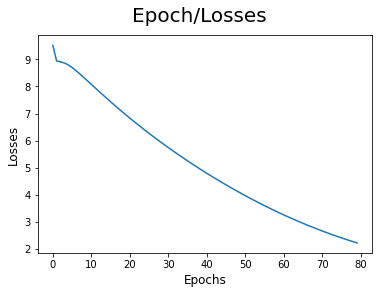

In [42]:
#Plot loss/epoch
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [43]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word
# (['we', 'are', 'to', 'study'], 'about')
predict(['sall', 'born', 'is', 'a'])

'december'

In [44]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))
accuracy()

0.5760348583877996

## Conclusion 

Le model embedding basé sur SVD a un score de 0.9987351298332214 tandis que le model Word2vec a un score de 0.5760348583877996. De ce fait le model embedding basé sur SVD parait plus performant.